In [178]:
import pandas as pd
import numpy as np  
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import pyreadr
from plotnine import *

- **NOME:** Pedro Luís Azevedo Costa
- **RA:** 175857

# Exercício 4

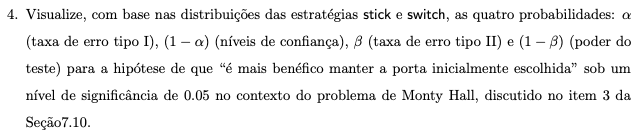

In [360]:
def simulacao_monty_hall(num_amostras: int, troca: bool, seed=42):
    np.random.seed(seed)

    vitorias = 0

    for _ in range(num_amostras):
        # Define a porta que contém o prêmio
        premio = np.random.randint(0, 3)

        # Jogador escolhe uma porta
        escolha = np.random.randint(0, 3)

        # Monty abre uma porta que não é a escolha do jogador nem tem o prêmio
        portas_disponiveis = [porta for porta in range(3) if porta != escolha and porta != premio]
        porta_aberta = np.random.choice(portas_disponiveis)

        # Se o jogador escolher trocar
        if troca:
            # Jogador troca para a porta restante
            escolha = [porta for porta in range(3) if porta != escolha and porta != porta_aberta][0]

        # Verifica se a escolha final foi a porta com o prêmio
        if escolha == premio:
            vitorias += 1

    # Calcula a proporção de vitórias
    prob_vitoria = vitorias / num_amostras

    return prob_vitoria

def experimentos_mounty_hall(num_experimentos: int, num_amostras: int, troca: bool, seed=42):

    vitorias = []

    np.random.seed(seed)

    random_seed = np.random.randint(0, 1000, size=num_experimentos)

    for _ in range(num_experimentos):
        vitorias.append(simulacao_monty_hall(num_amostras, troca, seed=random_seed[_]))

    return np.array(vitorias)


prob_vitorias_sem_troca = experimentos_mounty_hall(1000, 100, False)
prob_vitorias_com_troca = experimentos_mounty_hall(1000, 100, True)

media_vitorias_sem_troca = np.mean(prob_vitorias_sem_troca)
media_vitorias_com_troca = np.mean(prob_vitorias_com_troca)

total_vitorias_sem_troca = np.sum(prob_vitorias_sem_troca)
total_vitorias_com_troca = np.sum(prob_vitorias_com_troca)

print(f'Porcentagem de vitórias sem troca: {media_vitorias_sem_troca:.3f}')
print(f'Porcentagem de vitórias com troca: {media_vitorias_com_troca:.3f}')


Porcentagem de vitórias sem troca: 0.336
Porcentagem de vitórias com troca: 0.664


In [17]:
# Parâmetros da simulação
n_simulations = 100_000  # Número de simulações
alpha = 0.05  # Nível de significância
true_switch_win_prob = 2/3  # Probabilidade de ganhar trocando
sample_size = 100  # Tamanho da amostra em cada simulação

# Simulando os resultados para 'stick' e 'switch'
np.random.seed(42)
stick_results = np.random.binomial(1, 1/3, (n_simulations, sample_size))
switch_results = np.random.binomial(1, 2/3, (n_simulations, sample_size))

# Calculando médias amostrais
stick_means = stick_results.mean(axis=1)
switch_means = switch_results.mean(axis=1)

# Teste estatístico: comparação das médias
critical_value = norm.ppf(1 - alpha)  # Valor crítico para o teste unilateral

# Calculando os erros Tipo I e Tipo II
reject_null = (switch_means - stick_means) > (critical_value / np.sqrt(sample_size))
alpha_empirical = np.mean(reject_null == False)  # Erro tipo I (falso positivo)
beta_empirical = np.mean((reject_null == False) & (switch_means > stick_means))  # Erro tipo II (falso negativo)

# Valores complementares
confidence_level = 1 - alpha_empirical
power = 1 - beta_empirical

# Visualização dos resultados
labels = [r'$\alpha$', r'$1 - \alpha$', r'$\beta$', r'$1 - \beta$']
values = [alpha_empirical, confidence_level, beta_empirical, power]

print(f"Alfa (Erro Tipo I): {alpha_empirical:.2f}")
print(f"Beta (Erro Tipo II): {beta_empirical:.2f}")
print(f"Nível de Confiança: {confidence_level:.2f}")
print(f"Poder do Teste: {power:.2f}")


# plt.figure(figsize=(8, 5))
# plt.bar(labels, values, color=['red', 'green', 'blue', 'orange'])
# plt.ylim(0, 1)
# plt.ylabel('Probabilidade')
# plt.title('Visualização de $\alpha$, $1 - \alpha$, $\beta$, e $1 - \beta$ no Problema de Monty Hall')
# plt.show()


Alfa (Erro Tipo I): 0.01
Beta (Erro Tipo II): 0.01
Nível de Confiança: 0.99
Poder do Teste: 0.99


In [21]:
stick_means

array([0.31, 0.33, 0.34, ..., 0.32, 0.4 , 0.37])

(100000, 100)

- H₀: : A estratégia de manter a porta (stick) é tão boa ou melhor que trocar.
- H₁: É mais benéfico trocar de porta (switch é vantajoso).


In [45]:
n_sim = 10000
alfa = 0.05 # Nível de significância
tam_amostra = 100

valor_critico = norm.ppf(1 - alfa) # teste unilateral


#rejeita_hipotese_nula = (prob_vitorias_com_troca - prob_vitorias_sem_troca) > valor_critico/(np.sqrt(sample_size))

rejeita_hipotese_nula = (prob_vitorias_com_troca - prob_vitorias_sem_troca) > valor_critico/(np.sqrt(sample_size))


alpha_empirical = np.mean(rejeita_hipotese_nula == False)  # Erro tipo I (falso positivo)
beta_empirical = np.mean((rejeita_hipotese_nula == False) & (prob_vitorias_com_troca > prob_vitorias_sem_troca))  # Erro tipo II (falso negativo)



print(alpha_empirical)
print(beta_empirical)

print(valor_critico)

0.0468
0.0453
1.6448536269514722


---

In [366]:
p1 = prob_vitorias_sem_troca.mean()
p2 = prob_vitorias_com_troca.mean()
n_simulations = 100

observed_rate = p2 
p_null = p1

def z_score_formula(observed_rate, p_null, n):
    """Calcula o Z-score para teste de hipóteses."""
    standard_error = np.sqrt(p_null * (1 - p_null) / n)  # Erro padrão
    z = (observed_rate - p_null) / standard_error         # Z-score
    return z

# Calcula o Z-score
z_score = z_score_formula(observed_rate, p_null, n_simulations)

# Calcular p-valor para erro tipo I (α)
p_value = 1 - norm.cdf(z_score)

# Erro tipo I (α)
alpha_calculated = p_value
# Nível de confiança (1 - α)
confidence_level = 1 - alpha_calculated

# Erro tipo II (β) e poder do teste (1 - β)
critical_value = norm.ppf(1 - alpha)  # Valor crítico para nível de significância
beta = norm.cdf(critical_value - z_score)
power = 1 - beta



print(z_score, p_value)
print(f"Erro tipo 1: {alpha_calculated}")
print(f"Nível de confiança: {confidence_level}")
print(f"Erro tipo 2: {beta}")
print(f"Poder de teste: {power}")


print(f"É maior que o erro de tipo 1: {alfa > alpha_calculated}")   


6.956506904812413 1.7440493493836584e-12
Erro tipo 1: 1.7440493493836584e-12
Nível de confiança: 0.999999999998256
Erro tipo 2: 5.4317571570168174e-08
Poder de teste: 0.9999999456824284
É maior que o erro de tipo 1: True


# Exercício 5

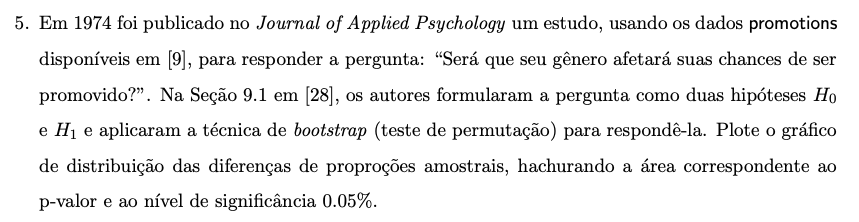

In [48]:
# Importa arquivo em rda
path = '/Users/pdcos/Documents/Estudos/Doutorado/IA376/analise_visual_ciencia_de_dados/participacao_9/promotions.rda'

df_promotions = pyreadr.read_r(path)

df_promotions = df_promotions['promotions']

df_promotions.head()

,id,decision,gender
0,1,promoted,male
1,2,promoted,male
2,3,promoted,male
3,4,promoted,male
4,5,promoted,male


- H₀: p_m - p_f = 0 (homens e mulheres tem salarios equivalentes)
- H₁: p_m - p_f > 0 (homens ganham mais que mulheres)

In [93]:
def shuffle_gender(df):
    df_copy = df.copy(deep=True)
    
    gender = df_copy['gender']
    gender_index = np.random.permutation(df_copy.index)
    gender = gender[gender_index].values
    df_copy['gender'] = gender

    return df_copy

In [286]:
def bootstrap_mean_diff(df, n_bootstraps):
    mean_diffs = []

    for _ in range(n_bootstraps):
        df_shuffled = shuffle_gender(df)
        # Faz o calculo da diferença entre proporções
        
        # Proporcao de homens promovidos
        prop_homem = df_shuffled.loc[(df_shuffled['decision'] == 'promoted') & (df_shuffled['gender'] == 'male')].shape[0]  
        prop_homem = prop_homem / df_shuffled.loc[df_shuffled['gender'] == 'male'].shape[0]
        # Proporcao de mulheres promovidas
        prop_mulher = df_shuffled.loc[(df_shuffled['decision'] == 'promoted') & (df_shuffled['gender'] == 'female')].shape[0]  
        prop_mulher = prop_mulher / df_shuffled.loc[df_shuffled['gender'] == 'female'].shape[0]

        mean_diff = prop_homem - prop_mulher

        mean_diffs.append(mean_diff)
    
    return np.array(mean_diffs)

n_bootstraps = 1000

mean_diffs = bootstrap_mean_diff(df_promotions, n_bootstraps)

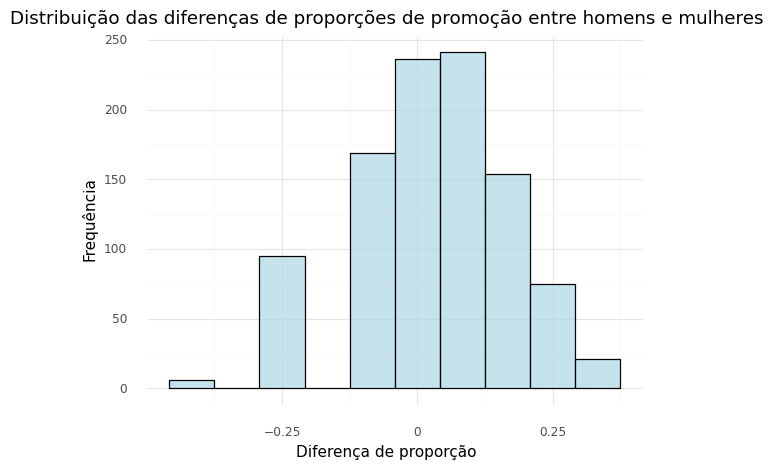

In [287]:
# printa o histograma com plotnine
plot = (ggplot(pd.DataFrame({'mean_diffs': mean_diffs}), aes(x='mean_diffs')) +
        geom_histogram(bins=10, color='black', fill='lightblue', alpha=0.7) +
        theme_minimal() +
        labs(title='Distribuição das diferenças de proporções de promoção entre homens e mulheres',
             x='Diferença de proporção',
             y='Frequência'))

print(plot)


In [288]:
prop_homem_original = df_promotions.loc[(df_promotions['decision'] == 'promoted') & (df_promotions['gender'] == 'male')].shape[0]
prop_homem_original = prop_homem_original / df_promotions.loc[df_promotions['gender'] == 'male'].shape[0]

prop_mulher_original = df_promotions.loc[(df_promotions['decision'] == 'promoted') & (df_promotions['gender'] == 'female')].shape[0]
prop_mulher_original = prop_mulher_original / df_promotions.loc[df_promotions['gender'] == 'female'].shape[0]

prop_diff_original = prop_homem_original - prop_mulher_original

print(prop_diff_original)

0.29166666666666663


In [289]:
# Calcula o p-valor
p_value = np.mean(mean_diffs >= prop_diff_original)

print(f'p-valor: {p_value:.3f}')

p-valor: 0.024


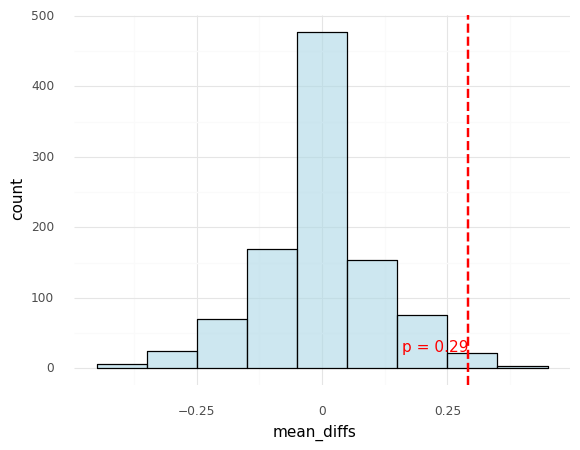

In [290]:
# Criar DataFrame a partir do vetor para o plot
p_value = prop_diff_original

df = pd.DataFrame({'mean_diffs': mean_diffs})

# Plot com histograma e áreas diferentes
plot = (
    ggplot(df, aes(x='mean_diffs')) +
    # Histograma base
    geom_histogram(
        aes(y=after_stat('count')), 
        binwidth=0.1, fill='lightblue', color='black', alpha=0.6
    ) +
    # Linha vertical no p_value
    geom_vline(xintercept=p_value, linetype='dashed', color='red', size=1) +
    # Anotação do p_value
    annotate('text', x=p_value, y=30, label=f'p = {p_value:.2f}', color='red', ha='right') +
    theme_minimal()
)

print(plot)


In [298]:


def bootstrap_mean_diff_without_permute(df, n_bootstraps):
    mean_diffs = []

    for _ in range(n_bootstraps):
        # Samples with replacement

        df_sample = df.sample(frac=1, replace=True)
        # Faz o calculo da diferença entre proporções
        
        # Proporcao de homens promovidos
        prop_homem = df_sample.loc[(df_sample['decision'] == 'promoted') & (df_sample['gender'] == 'male')].shape[0]  
        prop_homem = prop_homem / df_sample.loc[df_sample['gender'] == 'male'].shape[0]
        # Proporcao de mulheres promovidas
        prop_mulher = df_sample.loc[(df_sample['decision'] == 'promoted') & (df_sample['gender'] == 'female')].shape[0]  
        prop_mulher = prop_mulher / df_sample.loc[df_sample['gender'] == 'female'].shape[0]

        mean_diff = prop_homem - prop_mulher

        mean_diffs.append(mean_diff)
    
    return np.array(mean_diffs)

n_bootstraps = 1000

mean_diffs_replacement = bootstrap_mean_diff_without_permute(df_promotions, n_bootstraps)

In [299]:
# Encontra os percentis 0.025 e 0.975
percentil_025 = np.percentile(mean_diffs_replacement, 2.5)
percentil_975 = np.percentile(mean_diffs_replacement, 97.5)

print(f'Percentil 0.025: {percentil_025:.3f}') 
print(f'Percentil 0.975: {percentil_975:.3f}')

Percentil 0.025: 0.049
Percentil 0.975: 0.542


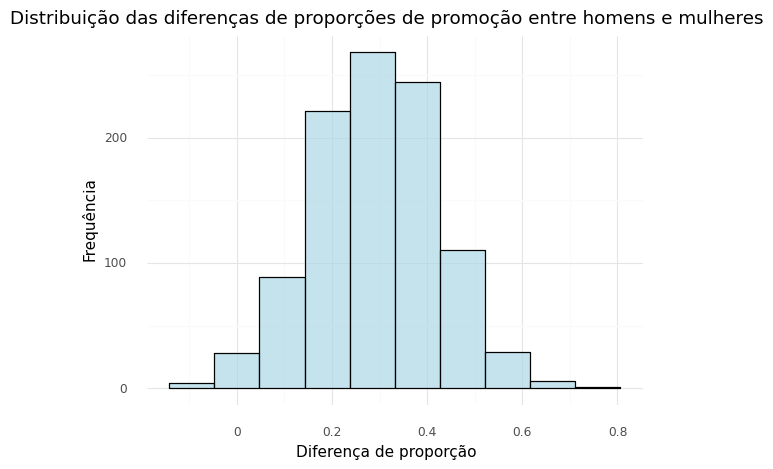

In [294]:
# Printa o histograma com plotnine

plot = (ggplot(pd.DataFrame({'mean_diffs': mean_diffs_replacement}), aes(x='mean_diffs')) +
        geom_histogram(bins=10, color='black', fill='lightblue', alpha=0.7) +
        theme_minimal() +
        labs(title='Distribuição das diferenças de proporções de promoção entre homens e mulheres',
             x='Diferença de proporção',
             y='Frequência'))

print(plot)

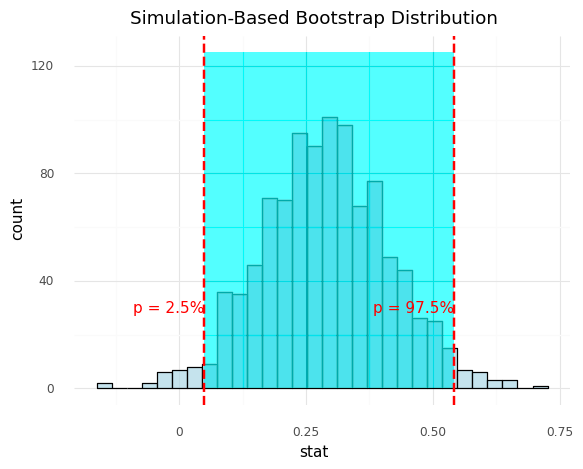

In [311]:
import pandas as pd
import numpy as np
from plotnine import *

# Sample data for the bootstrap distribution
np.random.seed(42)
bootstrap_distribution = np.random.beta(2, 5, size=1000)

# Create a DataFrame from the bootstrap distribution
df = pd.DataFrame({'stat': mean_diffs_replacement})

# Define the endpoints for the confidence interval
lower_bound = percentil_025
upper_bound = percentil_975

# Create the plot
plot = (
    ggplot(df, aes(x='stat')) +
    geom_histogram(bins=30, fill='lightblue', color='black', alpha=0.7) +
    geom_rect(aes(xmin=lower_bound, xmax=upper_bound, ymin=0, ymax=125), 
              fill='cyan', alpha=0.01) +
    labs(title='Simulation-Based Bootstrap Distribution', x='stat', y='count') +
    geom_vline(xintercept=lower_bound, linetype='dashed', color='red', size=1) +
    geom_vline(xintercept=upper_bound, linetype='dashed', color='red', size=1) +
    annotate('text', x=percentil_025, y=30, label=f'p = 2.5%', color='red', ha='right') +
    annotate('text', x=percentil_975, y=30, label=f'p = 97.5%', color='red', ha='right') +
    theme_minimal()
)

print(plot)


# Exercício 6

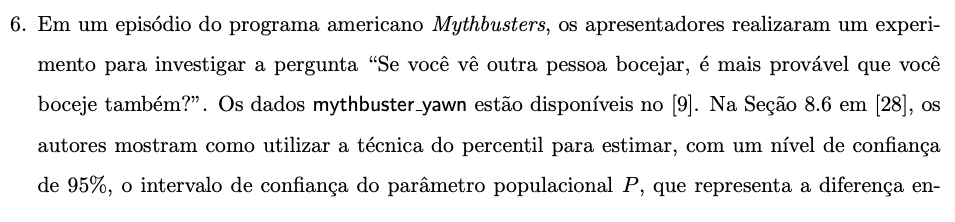

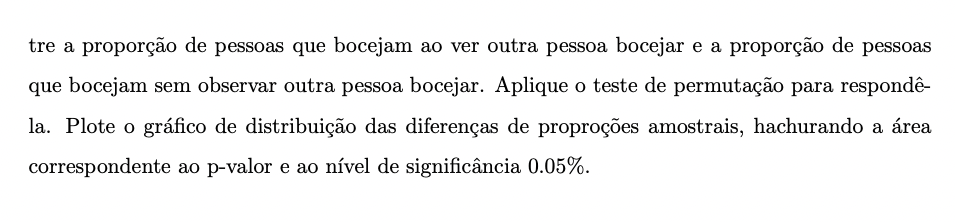

In [313]:
# Importa arquivo em rda
path = '/Users/pdcos/Documents/Estudos/Doutorado/IA376/analise_visual_ciencia_de_dados/participacao_9/mythbusters_yawn.rda'

df_yawn = pyreadr.read_r(path)['mythbusters_yawn']

df_yawn.head()


,subj,group,yawn
0,1,seed,yes
1,2,control,yes
2,3,seed,no
3,4,seed,yes
4,5,seed,no


- H₀: O bocejo não influencia (p_s - p_c = 0)
- H₁: O bocejo é contagioso (p_s - p_c > 0)

In [323]:
def shuffle_gender(df):
    df_copy = df.copy(deep=True)
    
    gender = df_copy['yawn']
    gender_index = np.random.permutation(df_copy.index)
    gender = gender[gender_index].values
    df_copy['yawn'] = gender

    return df_copy

def bootstrap_mean_diff(df, n_bootstraps):
    mean_diffs = []

    for _ in range(n_bootstraps):
        df_shuffled = shuffle_gender(df)
        # Faz o calculo da diferença entre proporções
        
        # Proporcao de homens promovidos
        prop_seed = df_shuffled.loc[(df_shuffled['yawn'] == 'yes') & (df_shuffled['group'] == 'seed')].shape[0]  
        prop_seed = prop_seed / df_shuffled.loc[df_shuffled['group'] == 'seed'].shape[0]
        # Proporcao de mulheres promovidas
        prop_control = df_shuffled.loc[(df_shuffled['yawn'] == 'yes') & (df_shuffled['group'] == 'control')].shape[0]  
        prop_control = prop_control / df_shuffled.loc[df_shuffled['group'] == 'control'].shape[0]

        mean_diff = prop_seed - prop_control

        mean_diffs.append(mean_diff)
    
    return np.array(mean_diffs)

n_bootstraps = 1000

mean_diffs = bootstrap_mean_diff(df_yawn, n_bootstraps)

In [330]:
# Proporcao de homens promovidos
prop_seed = df_yawn.loc[(df_yawn['yawn'] == 'yes') & (df_yawn['group'] == 'seed')].shape[0]  
prop_seed = prop_seed / df_yawn.loc[df_yawn['group'] == 'seed'].shape[0]
# Proporcao de mulheres promovidas
prop_control = df_yawn.loc[(df_yawn['yawn'] == 'yes') & (df_yawn['group'] == 'control')].shape[0]  
prop_control = prop_control / df_yawn.loc[df_yawn['group'] == 'control'].shape[0]

prop_diff_original = prop_seed - prop_control

print(f"O valor crítico é: {prop_diff_original}")

print(f"O p-valor é: {np.mean(mean_diffs >= prop_diff_original):.3f}")


O valor crítico é: 0.04411764705882354
O p-valor é: 0.519


In [331]:


def bootstrap_mean_diff_without_permute(df, n_bootstraps):
    mean_diffs = []

    for _ in range(n_bootstraps):
        # Samples with replacement

        df_sample = df.sample(frac=1, replace=True)
        # Faz o calculo da diferença entre proporções
        
        # Proporcao de homens promovidos
        prop_seed = df_sample.loc[(df_sample['yawn'] == 'yes') & (df_sample['group'] == 'seed')].shape[0]  
        prop_seed = prop_seed / df_sample.loc[df_sample['group'] == 'seed'].shape[0]
        # Proporcao de mulheres promovidas
        prop_control = df_sample.loc[(df_sample['yawn'] == 'yes') & (df_sample['group'] == 'control')].shape[0]  
        prop_control = prop_control / df_sample.loc[df_sample['group'] == 'control'].shape[0]


        mean_diff = prop_seed - prop_control

        mean_diffs.append(mean_diff)
    
    return np.array(mean_diffs)

n_bootstraps = 1000

mean_diffs_replacement = bootstrap_mean_diff_without_permute(df_yawn, n_bootstraps)

In [334]:
# Encontra os percentis 0.025 e 0.975
percentil_025 = np.percentile(mean_diffs_replacement, 2.5)
percentil_975 = np.percentile(mean_diffs_replacement, 97.5)

print(f'Percentil 0.025: {percentil_025:.3f}') 
print(f'Percentil 0.975: {percentil_975:.3f}')

Percentil 0.025: -0.232
Percentil 0.975: 0.286


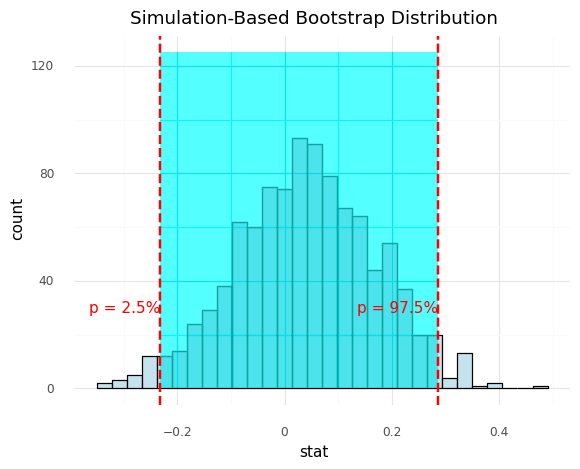

In [335]:
# Create a DataFrame from the bootstrap distribution
df = pd.DataFrame({'stat': mean_diffs_replacement})

# Define the endpoints for the confidence interval
lower_bound = percentil_025
upper_bound = percentil_975

# Create the plot
plot = (
    ggplot(df, aes(x='stat')) +
    geom_histogram(bins=30, fill='lightblue', color='black', alpha=0.7) +
    geom_rect(aes(xmin=lower_bound, xmax=upper_bound, ymin=0, ymax=125), 
              fill='cyan', alpha=0.01) +
    labs(title='Simulation-Based Bootstrap Distribution', x='stat', y='count') +
    geom_vline(xintercept=lower_bound, linetype='dashed', color='red', size=1) +
    geom_vline(xintercept=upper_bound, linetype='dashed', color='red', size=1) +
    annotate('text', x=percentil_025, y=30, label=f'p = 2.5%', color='red', ha='right') +
    annotate('text', x=percentil_975, y=30, label=f'p = 97.5%', color='red', ha='right') +
    theme_minimal()
)

print(plot)
